##  Pitches, scales, elements, frequencies, etc. IN RTcmix ! 
### (1) Pitches, Scales and Modes, now using the modules in "pitches.py"
### (2) Generating RTcmix scores from lists of pitches

In [66]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import Popen
import subprocess as sp
import os
import importlib


import sys
sys.path.append('../modules/')
# Contains most of the functions used in the previous notebook: 
import pitches as ptchs
importlib.reload(ptchs)

import IPython.display as ipd

# _ac stands for autocheck
cmixStatus, cmixResult = sp.getstatusoutput("CMIX")
if cmixStatus == 0:
    cmixInstalled = True
    print("CMIX found.")
else:
    cmixInstalled = False
    print("CMIX not found, using pyGoRTcmix instead.")

#for testing:
# cmixInstalled = False

CMIX found.


# ==============================================
## All the stuff from last notebook 
### (except for just intonation)
### built into the modules in pitches.py

In [80]:
# From the previous notebook: 
# make a scale (major) from intervals
k = np.hstack((0,np.cumsum(np.asarray([2, 2, 1, 2, 2, 2, 1]))))
print(k)
v = 0
root = 220 # A3
f = ptchs.note2freq(k,v,root)
print(f)

# ==============================
# Using the functions in "pitches" (ptchs) module:
pitch_classes = ptchs.make_pitch_classes()
print(pitch_classes)
key_name = 'A'
i_root = pitch_classes.index(key_name)
print(i_root)

NameFreq_dict = ptchs.pitch_dict()
print(NameFreq_dict)

root_name = 'A3' # taken from pitch_classes
root = NameFreq_dict[root_name]  

# call the function to create the dictionary of intervals for a range of modes
modes_dct = ptchs.modes()
print('modes_dct: ', modes_dct)

# extract arrays from the dictionary: 
intervals = modes_dct['modes7']['ionian']
print('intervals: ', intervals)

elements = ptchs.intervals2elements(intervals)
print('elements: ', elements)
#print(type(elements))

# -----------------------------
# ROTATION for the pitch ring ! 
key_all_names = []
key_all_inds = []
for i in range(0,12):
    newind = (i_root+i)%12
    key_all_inds.append(newind)
    key_all_names.append(pitch_classes[newind])  # the % is called "modulo" or remainder-- very useful! 

print('key_all_inds: ', key_all_inds)
print('key_all_names: ', key_all_names)
key_inds = [key_all_inds[i] for i in elements[:-1]]
key_names = [key_all_names[i] for i in elements[:-1]]
print('key_inds: ', key_inds)
print('key_names: ', key_names)

f2 = ptchs.note2freq(elements,v,root)
print(f2)


[ 0  2  4  5  7  9 11 12]
[220.   246.94 277.18 293.66 329.63 369.99 415.3  440.  ]
['C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#', 'A', 'A#', 'B']
9
{'C2': 65.41, 'C#2': 69.3, 'D2': 73.42, 'D#2': 77.78, 'E2': 82.41, 'F2': 87.31, 'F#2': 92.5, 'G2': 98.0, 'G#2': 103.83, 'A2': 110.0, 'A#2': 116.54, 'B2': 123.47, 'C3': 130.81, 'C#3': 138.59, 'D3': 146.83, 'D#3': 155.56, 'E3': 164.81, 'F3': 174.61, 'F#3': 185.0, 'G3': 196.0, 'G#3': 207.65, 'A3': 220.0, 'A#3': 233.08, 'B3': 246.94, 'C4': 261.63, 'C#4': 277.18, 'D4': 293.66, 'D#4': 311.13, 'E4': 329.63, 'F4': 349.23, 'F#4': 369.99, 'G4': 392.0, 'G#4': 415.3, 'A4': 440.0, 'A#4': 466.16, 'B4': 493.88, 'C5': 523.25, 'C#5': 554.37, 'D5': 587.33, 'D#5': 622.25, 'E5': 659.26, 'F5': 698.46, 'F#5': 739.99, 'G5': 783.99, 'G#5': 830.61, 'A5': 880.0, 'A#5': 932.33, 'B5': 987.77, 'C6': 1046.5, 'C#6': 1108.73, 'D6': 1174.66, 'D#6': 1244.51, 'E6': 1318.51, 'F6': 1396.91, 'F#6': 1479.98, 'G6': 1567.98, 'G#6': 1661.22, 'A6': 1760.0, 'A#6': 1864.66, 'B6': 

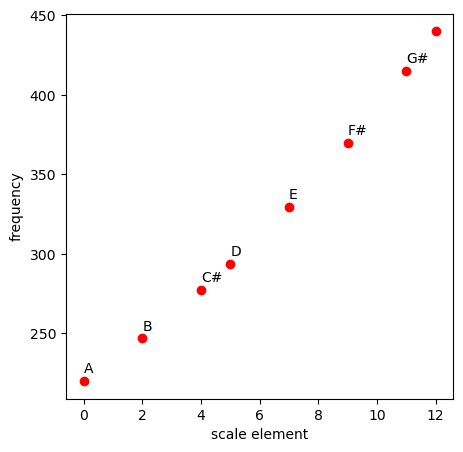

In [55]:
fig = plt.figure(figsize=(5,5))

plt.plot(elements,f2, 'ro')
plt.xlabel('scale element')
plt.ylabel('frequency')
for i,name in enumerate(key_names):
    plt.text(elements[i],f2[i]+5,name)

plt.show()

### OR, the pitch wheel representation: 

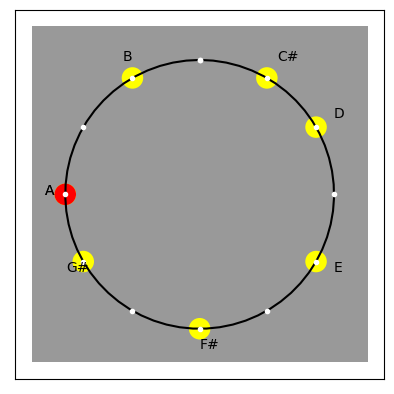

In [67]:
# add a circle around root note!
ptchs.makePitchRing(key_inds)

And another one:

In [81]:
# calculate the elements of the scale from the intervals (a cumulative sum): 

#intervals = modes_dct['ionian']
intervals = modes_dct['modes7']['mixolydian']
print(intervals)

root_name = 'C3' # taken from pitch_classes
root = NameFreq_dict[root_name]

elements = ptchs.intervals2elements(intervals)

freqs = ptchs.note2freq(elements,v,root)
print(freqs)

[2, 2, 1, 2, 2, 1, 2]
[130.81 146.83 164.81 174.61 195.99 220.   233.08 261.62]


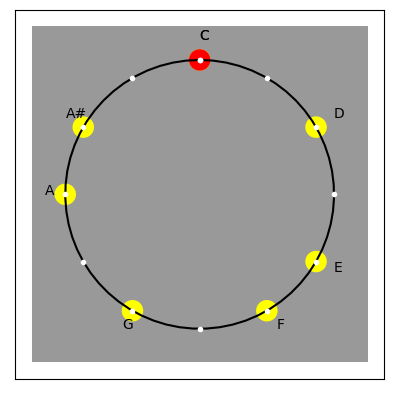

In [77]:
ptchs.makePitchRing(elements[:-1])
# note that because this is starting with C we don't need to rotate it-- 
# any other key we need to do the rotation shown above

# ==========================================================
# (6) generating RTcmix scores from simple lists of pitches
### same as above but with RTcmix

In [82]:
# FUNCTION FOR GENERATING THE RTcmix score ! 

def makeSimpleScore(base_name,time,freqs):
    # ====================
    score_name = base_name + '.sco'
    print(score_name)
    f_out = open("./" + score_name , 'w')
    # YOU MUST DELETE THE SOUND FILE BEFORE RUNNING (either with python or with -clobber )
    f_out.write("set_option(\"clobber = on\")\n")

    f_out.write("rtsetparams(44100, 2)\n")
    f_out.write("load(\"WAVETABLE\")\n")

    # output_string = 'rtoutput(\"' + base_name + '.wav\")\n'  
    # don't need the brackets to make it an array ! 
    # f_out.write(output_string)

    #----------------------CHECK IF CMIX COMMAND IS INSTALLED-----------------------
    #only use rtoutput if CMIX command is found.
    cmixStatus, cmixResult = sp.getstatusoutput("CMIX")
    #the cmixInstalled variable can also be passed from the notebook
    #in that is case, the output of sp.getstatusoutput("CMIX") is overridden

    if cmixInstalled:
        cmixStatus = 0
    else:
        cmixStatus = 127

    if cmixStatus == 0:
        output_string = 'rtoutput(\"' + base_name + '.wav\")\n'
        # don't need the brackets to make it an array !
        print("CMIX found.")
        print(output_string)
        f_out.write(output_string)
    else:
        print("CMIX not found; rtoutput() will not be used in score.")
    #------------------------------------------------------------------------------
    
    f_out.write("waveform = maketable(\"wave\", 1000, 1.0)\n")
    # to add overtones, just add amplitude weights
    #f_out.write("waveform = maketable(\"wave\", 1000, 1.0, 0.4, 0.2)\n")

    f_out.write("ampenv = maketable(\"window\", 1000, \"hamming\")\n")    

    # write out the score ! 
    # (start time, duration, amplitude, frequency, channel mix [0 left, 1.0 right],
    # table_handle (which waveform to use)

    # for now, constants: 
            
    # reset(44100) makes it very very smooth... 
            
    amp = 10000 
    mix = 0.5 # 0 = left, 1 = right, but here just 1 channel
    tab_han = 'waveform'

    for i,freq_val in enumerate(freqs):
        t_start = time[i]
        # dur = durations[i]-- here, constant, defined above
        dur = 1.4
        freq = freq_val
        note_string = 'WAVETABLE(' + str(t_start) + ', ' \
                  + str(dur)  + ', ' + str(amp)+ '*ampenv' + ', ' \
                  + str(freq)  + ', ' + str(mix)  + ', ' \
                  +  tab_han + ')\n' 
        f_out.write(note_string)
        
    f_out.close()
    return score_name



In [84]:
# EXERCISE:  MAKE AN RTCMIX SCORE FROM THIS... 
base_name = 'mixolydian_C3'
# pluck freqs out of the scale... or calculate freqs with k ? 
time_sco = np.linspace(0,10,len(freqs))

makeSimpleScore(base_name,time_sco,freqs)

mixolydian_C3.sco
CMIX found.
rtoutput("mixolydian_C3.wav")



'mixolydian_C3.sco'

In [85]:
# READ THE SCORE ! 

scoread = open(base_name+'.sco')
data = scoread.read()
print(data)


set_option("clobber = on")
rtsetparams(44100, 2)
load("WAVETABLE")
rtoutput("mixolydian_C3.wav")
waveform = maketable("wave", 1000, 1.0)
ampenv = maketable("window", 1000, "hamming")
WAVETABLE(0.0, 1.4, 10000*ampenv, 130.81, 0.5, waveform)
WAVETABLE(1.4285714285714286, 1.4, 10000*ampenv, 146.83, 0.5, waveform)
WAVETABLE(2.857142857142857, 1.4, 10000*ampenv, 164.81, 0.5, waveform)
WAVETABLE(4.285714285714286, 1.4, 10000*ampenv, 174.61, 0.5, waveform)
WAVETABLE(5.714285714285714, 1.4, 10000*ampenv, 195.99, 0.5, waveform)
WAVETABLE(7.142857142857143, 1.4, 10000*ampenv, 220.0, 0.5, waveform)
WAVETABLE(8.571428571428571, 1.4, 10000*ampenv, 233.08, 0.5, waveform)
WAVETABLE(10.0, 1.4, 10000*ampenv, 261.62, 0.5, waveform)



In [86]:
# play RTcmix score and create a wave file
# use CMIX if installed; if not, use pyGoRTcmix
abitextra = 0.5
dur_sound = time_sco[-1] + abitextra 

if cmixInstalled:
    cmix_cmd = 'CMIX < ' + base_name + '.sco'
    print(cmix_cmd)
else:
    print('using pyGo')
    dur = str(dur_sound)
    #cmix_cmd = os.path.abspath('../pyGoRTcmix/pyGoRTcmix') + ' -inputscore ' + os.path.abspath(base_name + '.sco') + ' -output ' + os.path.abspath(base_name + '.wav') + ' -dur ' + dur
    cmix_cmd = os.path.abspath('../pyGoRTcmix/Contents/MacOS/pyGoRTcmix') + ' -inputscore ' + os.path.abspath(base_name + '.sco') + ' -output ' + os.path.abspath(base_name + '_pyGo.wav') + ' -dur ' + dur
   
    print(cmix_cmd)

runCMIX = sp.Popen(cmix_cmd, shell=True) # if can only be called from a shell, use shell=True

runCMIX.wait()
print('\nhopefully i just wrote your sound file (' + base_name + '.wav); is it here?')

if sys.platform == 'win32':
    ! dir *.wav
else:
    ! ls *.wav

CMIX < mixolydian_C3.sco
--------> RTcmix 5.2.0 (CMIX) <--------
set_option:  "clobber = on" 
rtsetparams:  44100 2 
rtsetparams:  Audio set:  44100 sampling rate, 2 channels

load:  "WAVETABLE" 
load:  Loaded RT functions from shared library:
	'/Users/ben/RTcmix/shlib/libWAVETABLE.so'.
rtoutput:  "mixolydian_C3.wav" 
Output file set for writing:
      name:  mixolydian_C3.wav
      type:  RIFF
    format:  little endian short (16 bits)
     srate:  44100
     chans:  2
maketable:  "wave" 1000 1 
maketable:  "window" 1000 "hamming" 
WAVETABLE:  0 1.4 PF:[800,...,800.091] 130.81 0.5 PF:[0,...,-0.00628314] 
No bus_config defined, setting default (in/out).
default: () => WAVETABLE => (out 0-1)

WAVETABLE:  1.42857 1.4 PF:[800,...,800.091] 146.83 0.5 PF:[0,...,-0.00628314] 
WAVETABLE:  2.85714 1.4 PF:[800,...,800.091] 164.81 0.5 PF:[0,...,-0.00628314] 
WAVETABLE:  4.28571 1.4 PF:[800,...,800.091] 174.61 0.5 PF:[0,...,-0.00628314] 
WAVETABLE:  5.71429 1.4 PF:[800,...,800.091] 195.99 0.5 PF:

In [66]:
# to automatically move the sound and score files to a different directory: 
# move_cmd = 'mv ' + base_name + '.* ../3_output_nogit/'
# sp.Popen(move_cmd, shell=True)

## MICROPROJECT:  
(1) Make the note sequence random  <br> 
(2) Make the note sequence microtonal  <br> 
(3) Make a rhythm by moving start times  <br> 

In [58]:
# EXERCISE:  CHANGE THE ROOT NOTE OF THE SCALE ! 


In [ ]:
# EXERCISE: STRING TOGETHER A SERIES OF SCALES, LOOPING OVER ONE THING TO CHANGE, 
# such as root note or mode... and make a longer RTcmix score... 

### (7) Circles of 5ths and 4ths... 
### (8) More considerations for composing from data.. chords... key changes, microtonal scales... 